In [4]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import CausalnexDataset as cd


file = '../preprocess_mars_express/MarsExpressPower/marsexpress_dataset.csv'
a = cd.CausalnexDataset(dataset=file, delimiter_char=",", dropna= True, columns_to_drop=["ut_ms"], threshold=0)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


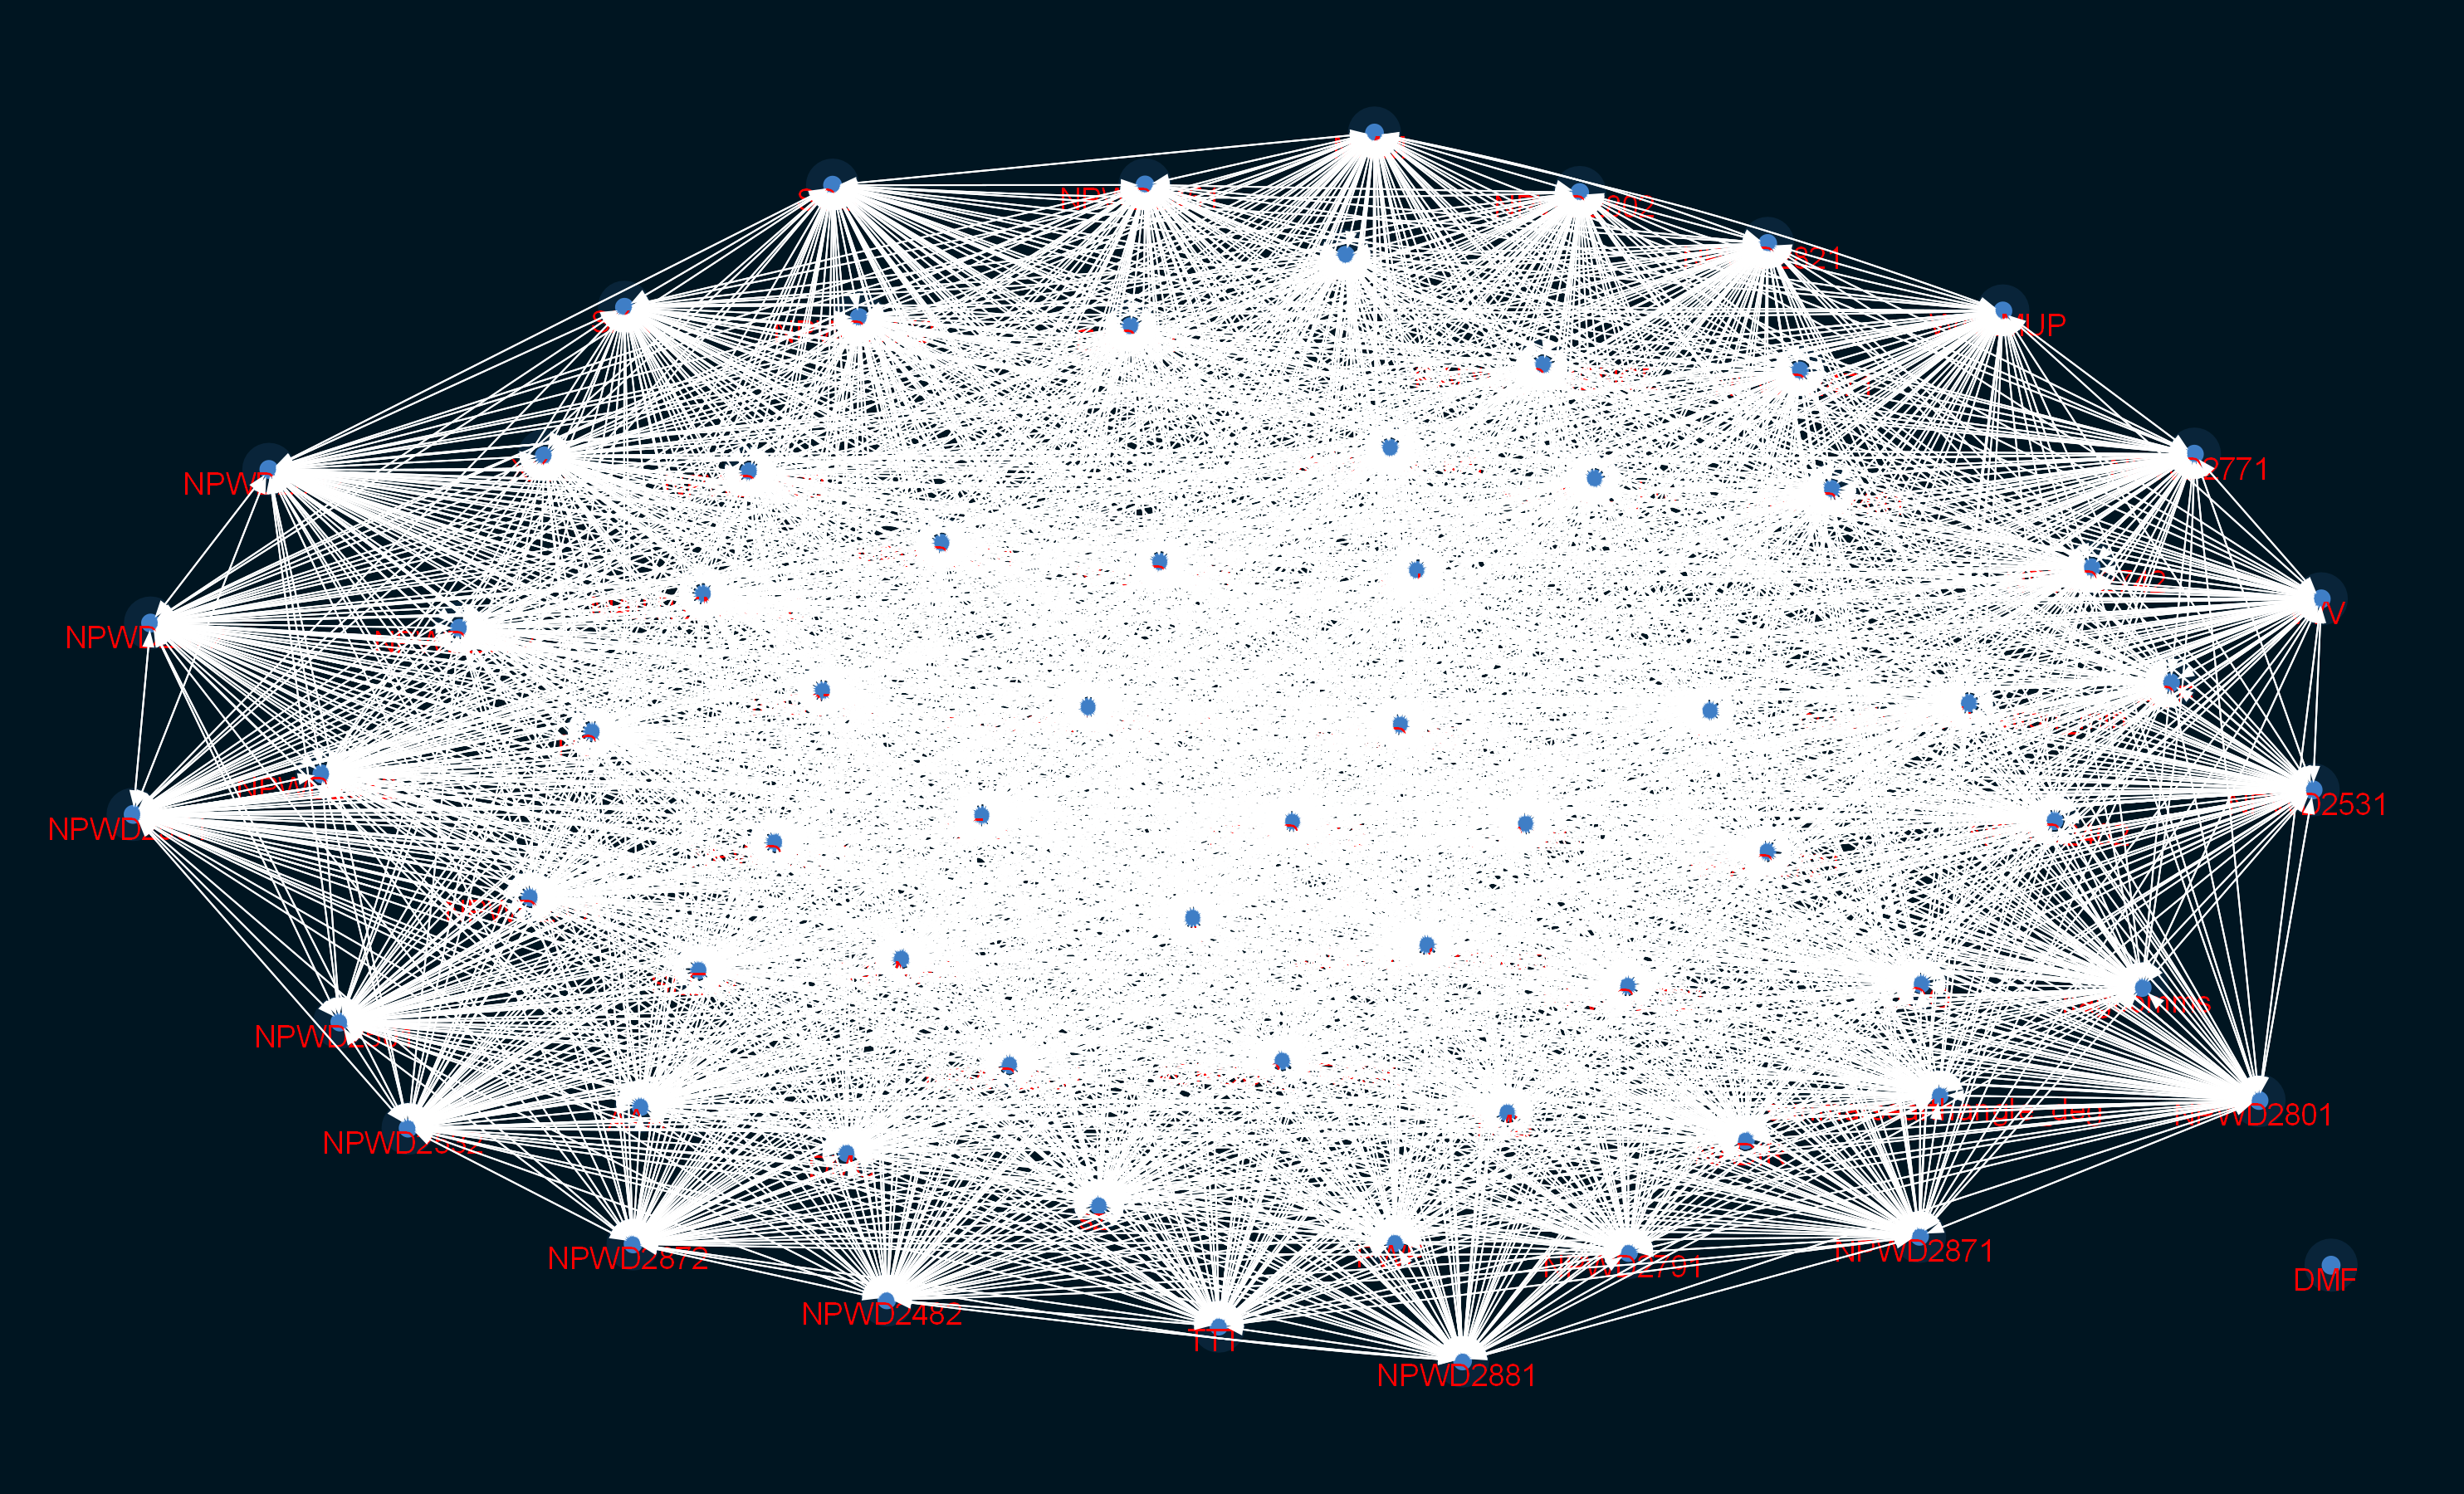

In [5]:

viz = a.get_graph()

Image(viz.draw(format="png"))

In [6]:
# Obtenemos los datos estadísticos de la matriz de adyancencia para planear un cribado de las relaciones espurias y menos relevantes


a.get_edges_data()

weight
count  3.767000e+03
mean   3.094638e-04
std    1.772648e-02
min    1.455402e-26
25%    5.184236e-21
50%    4.511730e-19
75%    3.027723e-17
max    1.085003e+00

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


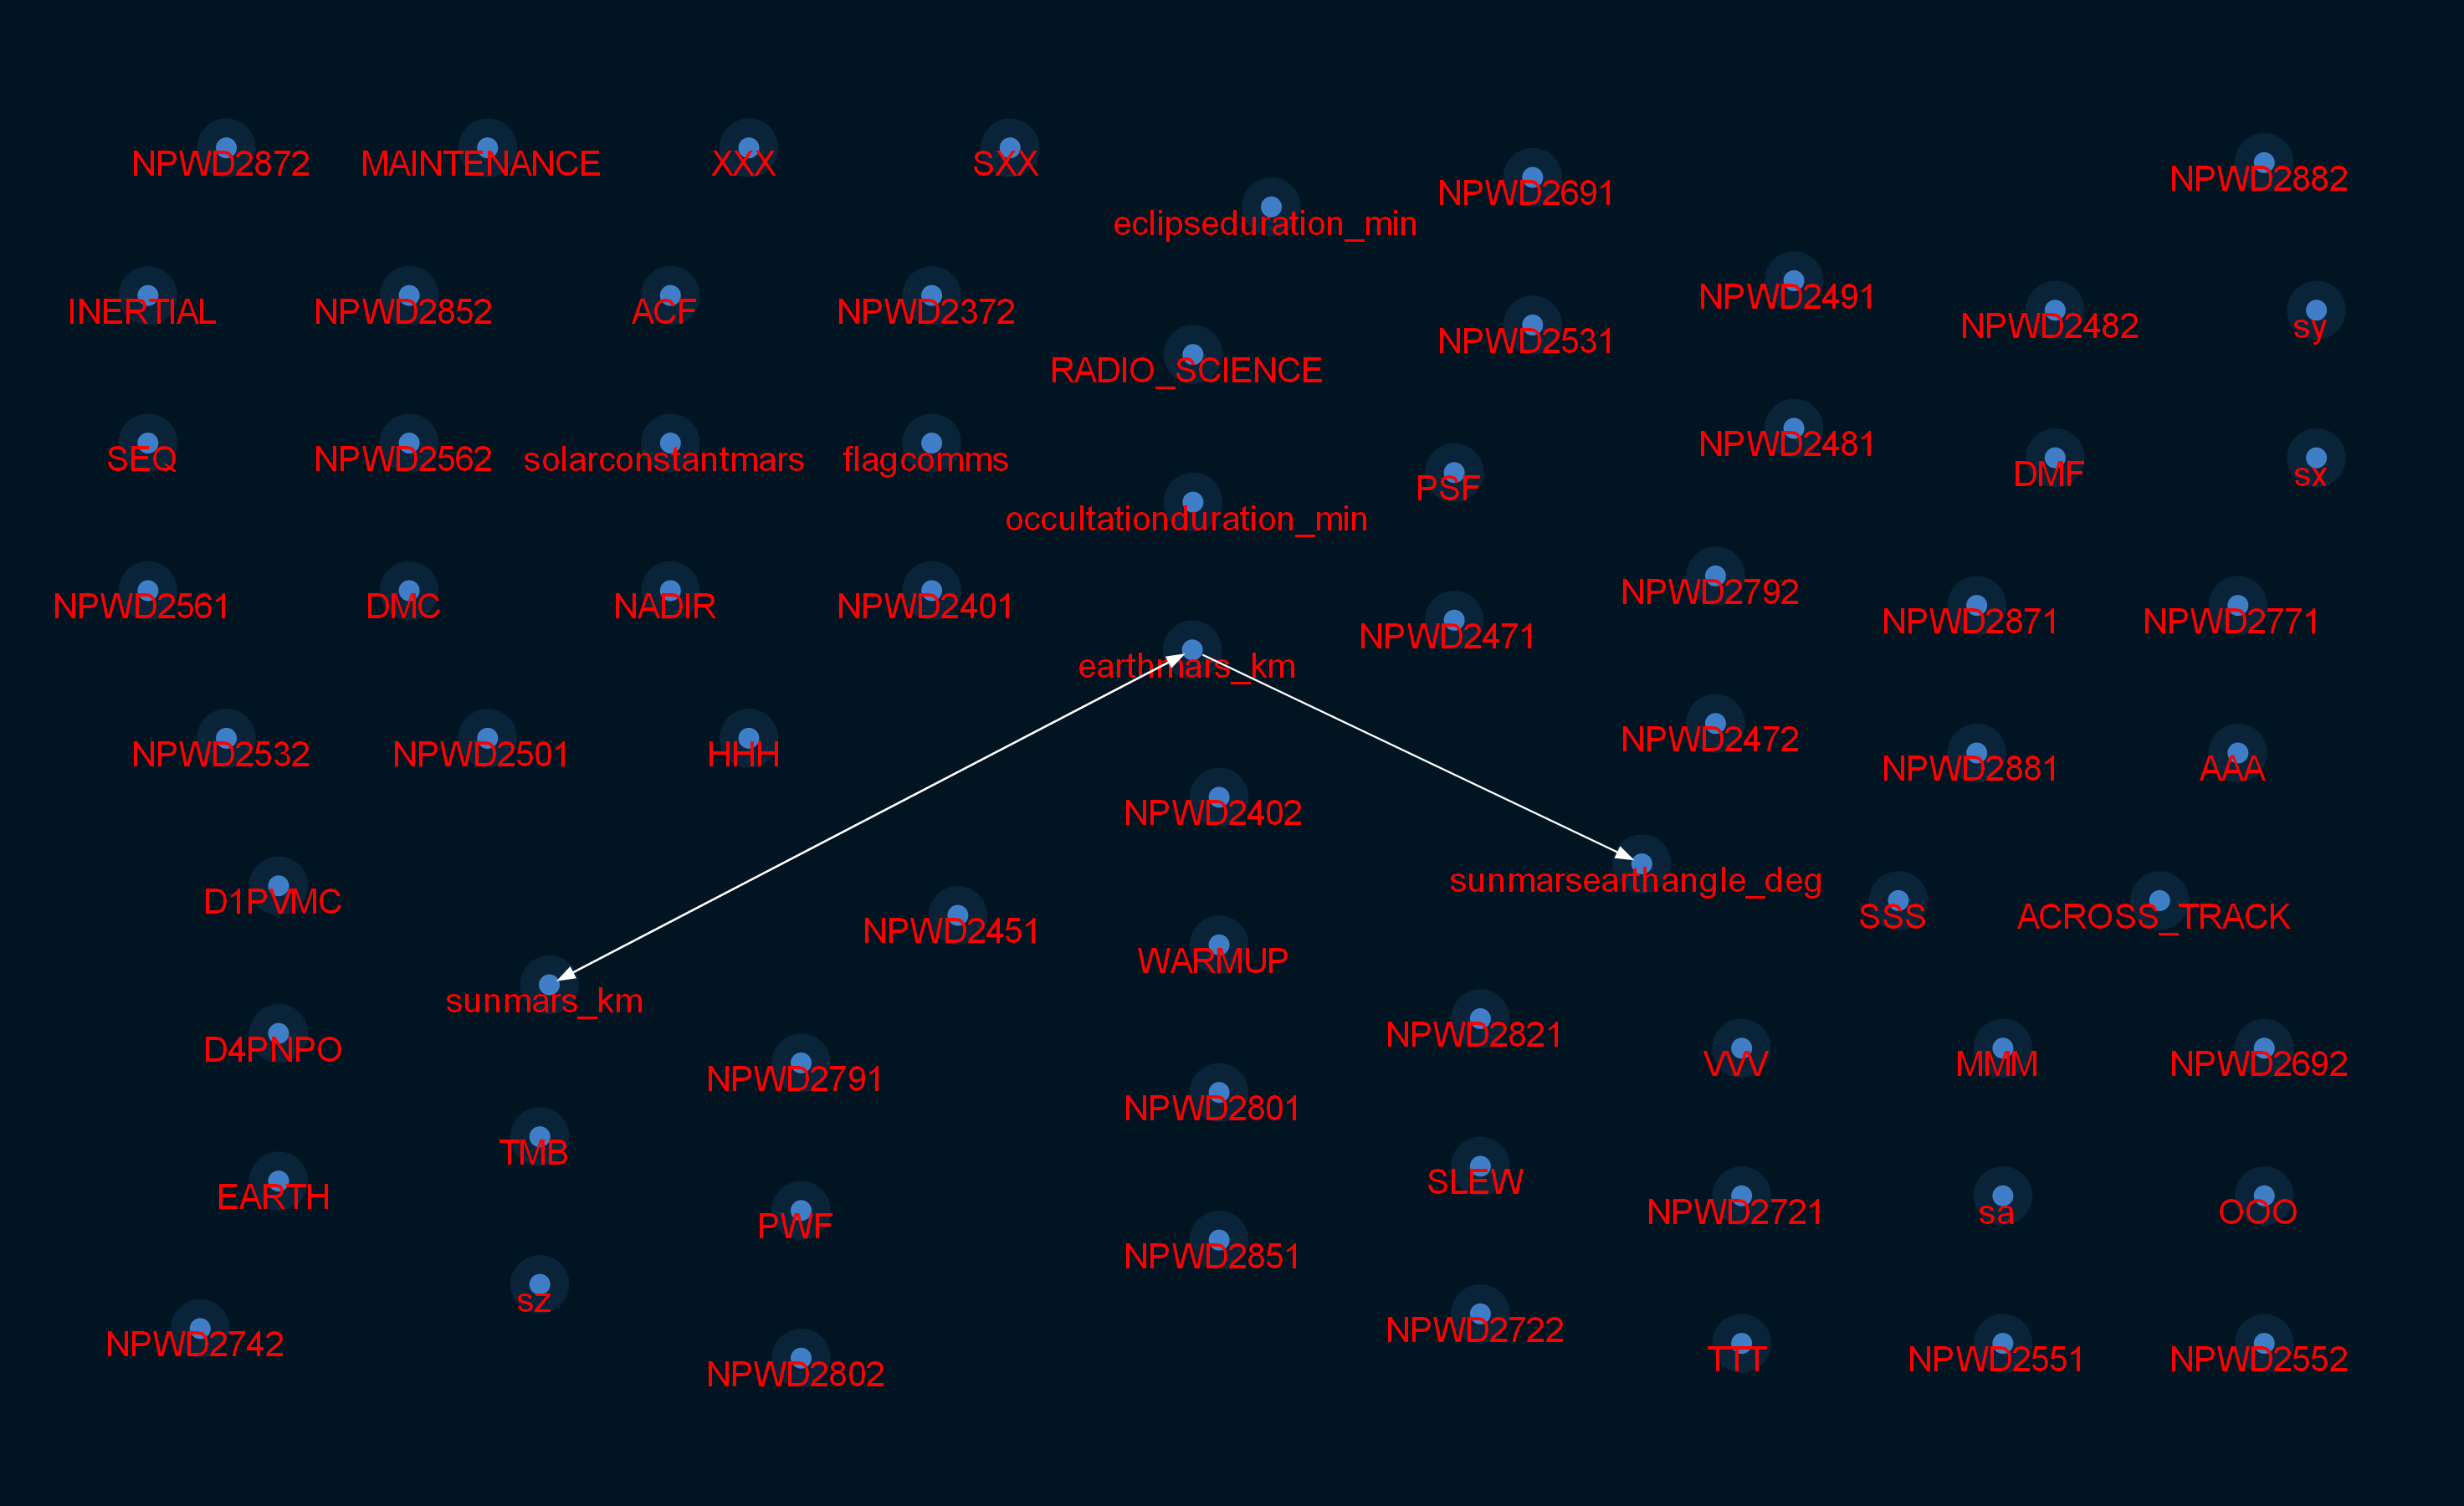

In [15]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
mean = 4.203931e-04
a.reset_threshold(mean)
viz = a.get_graph()

Image(viz.draw(format="png"))

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


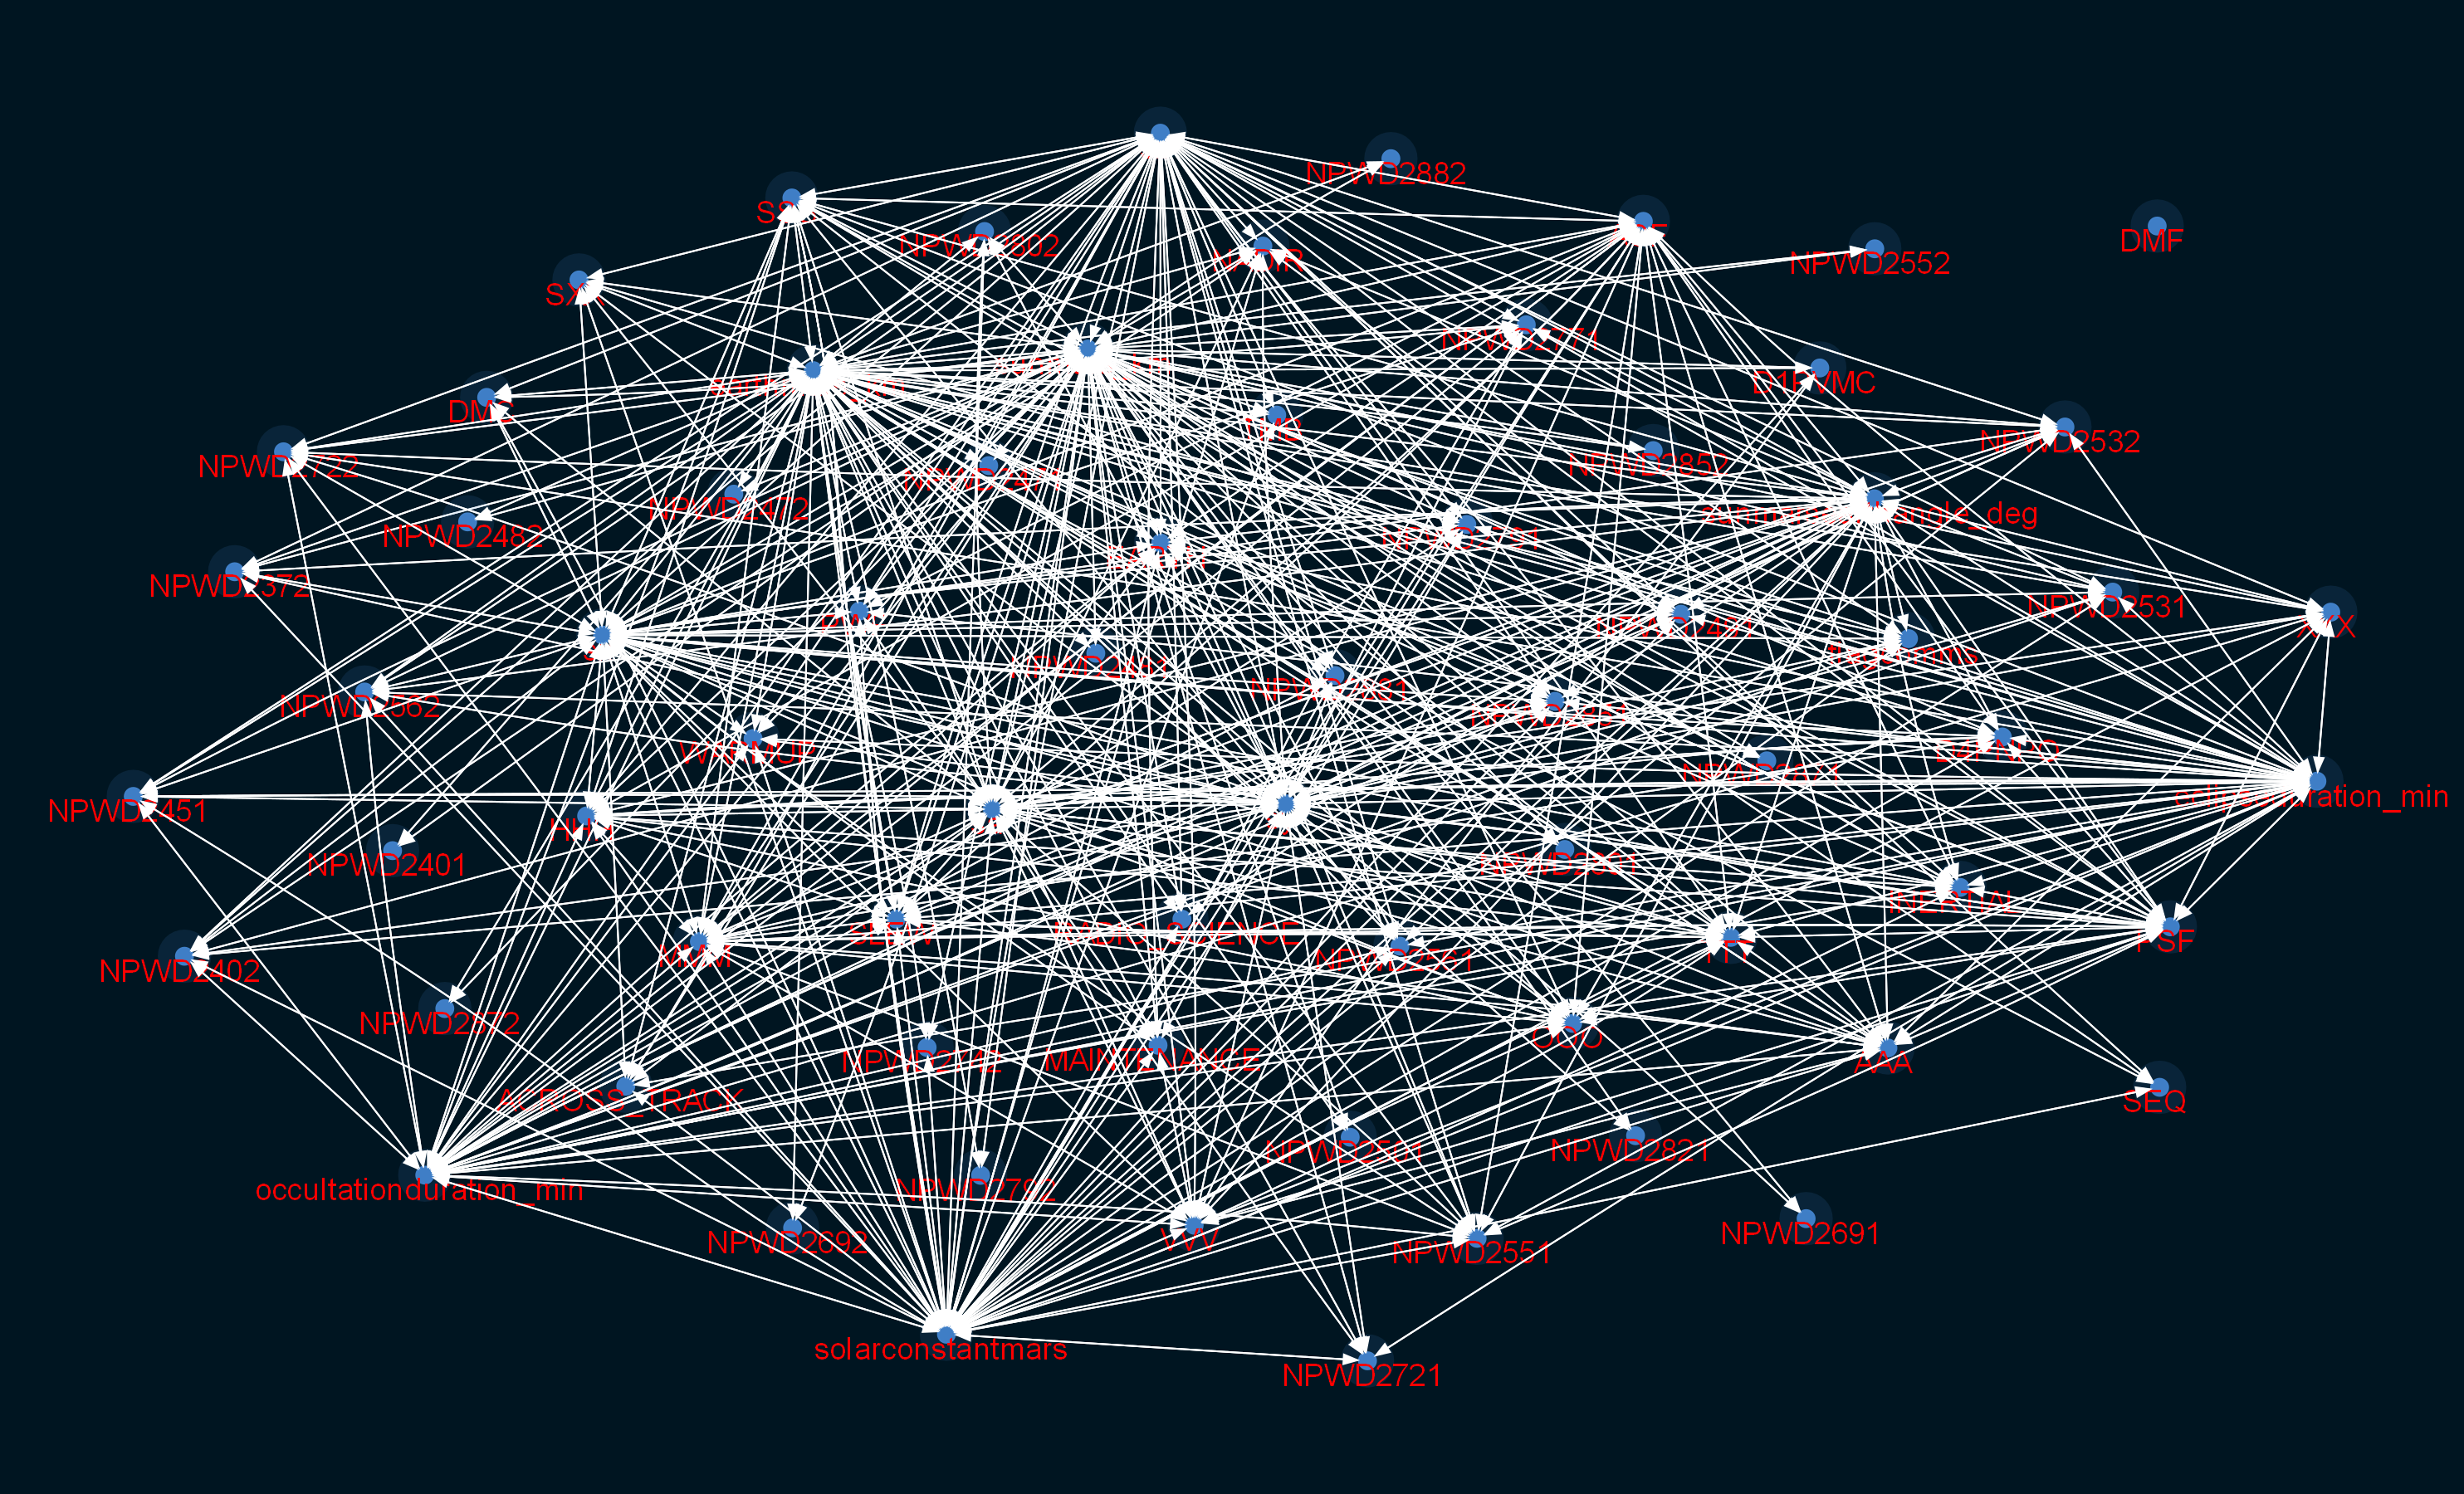

In [8]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
q3 = 3.854647e-17
a.reset_threshold(q3)
viz = a.get_graph()

Image(viz.draw(format="png"))

In [9]:
# El cuartil 3 tiene un valor demasiado bajo y nos proporciona más relaciones de las que cabría esperar. Vamos a examinar los pesos más elevados para poder elegir un umbral razonable.

df = a.edges_to_dataframe().sort_values("weight", ascending=False)
df.head(60)


source                   target        weight
354               sunmars_km             earthmars_km  1.085003e+00
419             earthmars_km               sunmars_km  8.070393e-02
499        solarconstantmars               sunmars_km  1.742341e-05
500        solarconstantmars             earthmars_km  9.406414e-06
291                       sz               sunmars_km  3.274689e-06
250                       sy               sunmars_km  2.736351e-06
292                       sz             earthmars_km  1.311686e-06
356               sunmars_km        solarconstantmars  1.307852e-06
251                       sy             earthmars_km  1.233721e-06
420             earthmars_km        solarconstantmars  1.054588e-06
208                       sx               sunmars_km  7.435971e-07
457    sunmarsearthangle_deg               sunmars_km  7.434865e-07
580  occultationduration_min               sunmars_km  5.789288e-07
546      eclipseduration_min               sunmars_km  5.072701e-07
353               sunmars_km                       sz  3.548845e-07
352               sunmars_km                       sy  2.636294e-07
547      eclipseduration_min             earthmars_km  1.892352e-07
209                       sx             earthmars_km  1.891186e-07
173                       sa               sunmars_km  1.857411e-07
458    sunmarsearthangle_deg             earthmars_km  1.794857e-07
581  occultationduration_min             earthmars_km  1.719463e-07
355               sunmars_km    sunmarsearthangle_deg  1.088616e-07
351               sunmars_km                       sx  1.065811e-07
417             earthmars_km                       sy  1.040505e-07
418             earthmars_km                       sz  8.287077e-08
358               sunmars_km  occultationduration_min  7.707169e-08
174                       sa             earthmars_km  7.399163e-08
603                      AAA               sunmars_km  6.624260e-08
357               sunmars_km      eclipseduration_min  5.830989e-08
670                      PSF               sunmars_km  5.512578e-08
769                      ACF               sunmars_km  4.168403e-08
636                      MMM               sunmars_km  3.966328e-08
52                  NPWD2532               sunmars_km  3.897610e-08
604                      AAA             earthmars_km  3.860852e-08
671                      PSF             earthmars_km  2.992254e-08
22                  NPWD2451               sunmars_km  2.215248e-08
350               sunmars_km                       sa  2.022655e-08
730                      TTT               sunmars_km  1.958674e-08
53                  NPWD2532             earthmars_km  1.807851e-08
637                      MMM             earthmars_km  1.776849e-08
872                     SLEW               sunmars_km  1.542619e-08
745                      VVV               sunmars_km  1.520935e-08
770                      ACF             earthmars_km  1.484466e-08
825                    EARTH               sunmars_km  1.398337e-08
84                  NPWD2562               sunmars_km  1.274556e-08
704                      SSS               sunmars_km  1.158939e-08
62                  NPWD2551               sunmars_km  1.155995e-08
620                      HHH               sunmars_km  1.140494e-08
656                      OOO               sunmars_km  1.043893e-08
75                  NPWD2561               sunmars_km  9.893731e-09
144                 NPWD2851               sunmars_km  9.472710e-09
421             earthmars_km      eclipseduration_min  9.309732e-09
23                  NPWD2451             earthmars_km  9.009674e-09
731                      TTT             earthmars_km  8.534877e-09
38                  NPWD2491               sunmars_km  6.206823e-09
85                  NPWD2562             earthmars_km  5.747026e-09
115                 NPWD2771               sunmars_km  5.692825e-09
826                    EARTH             earthmars_km  5.549496e-09
12        

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


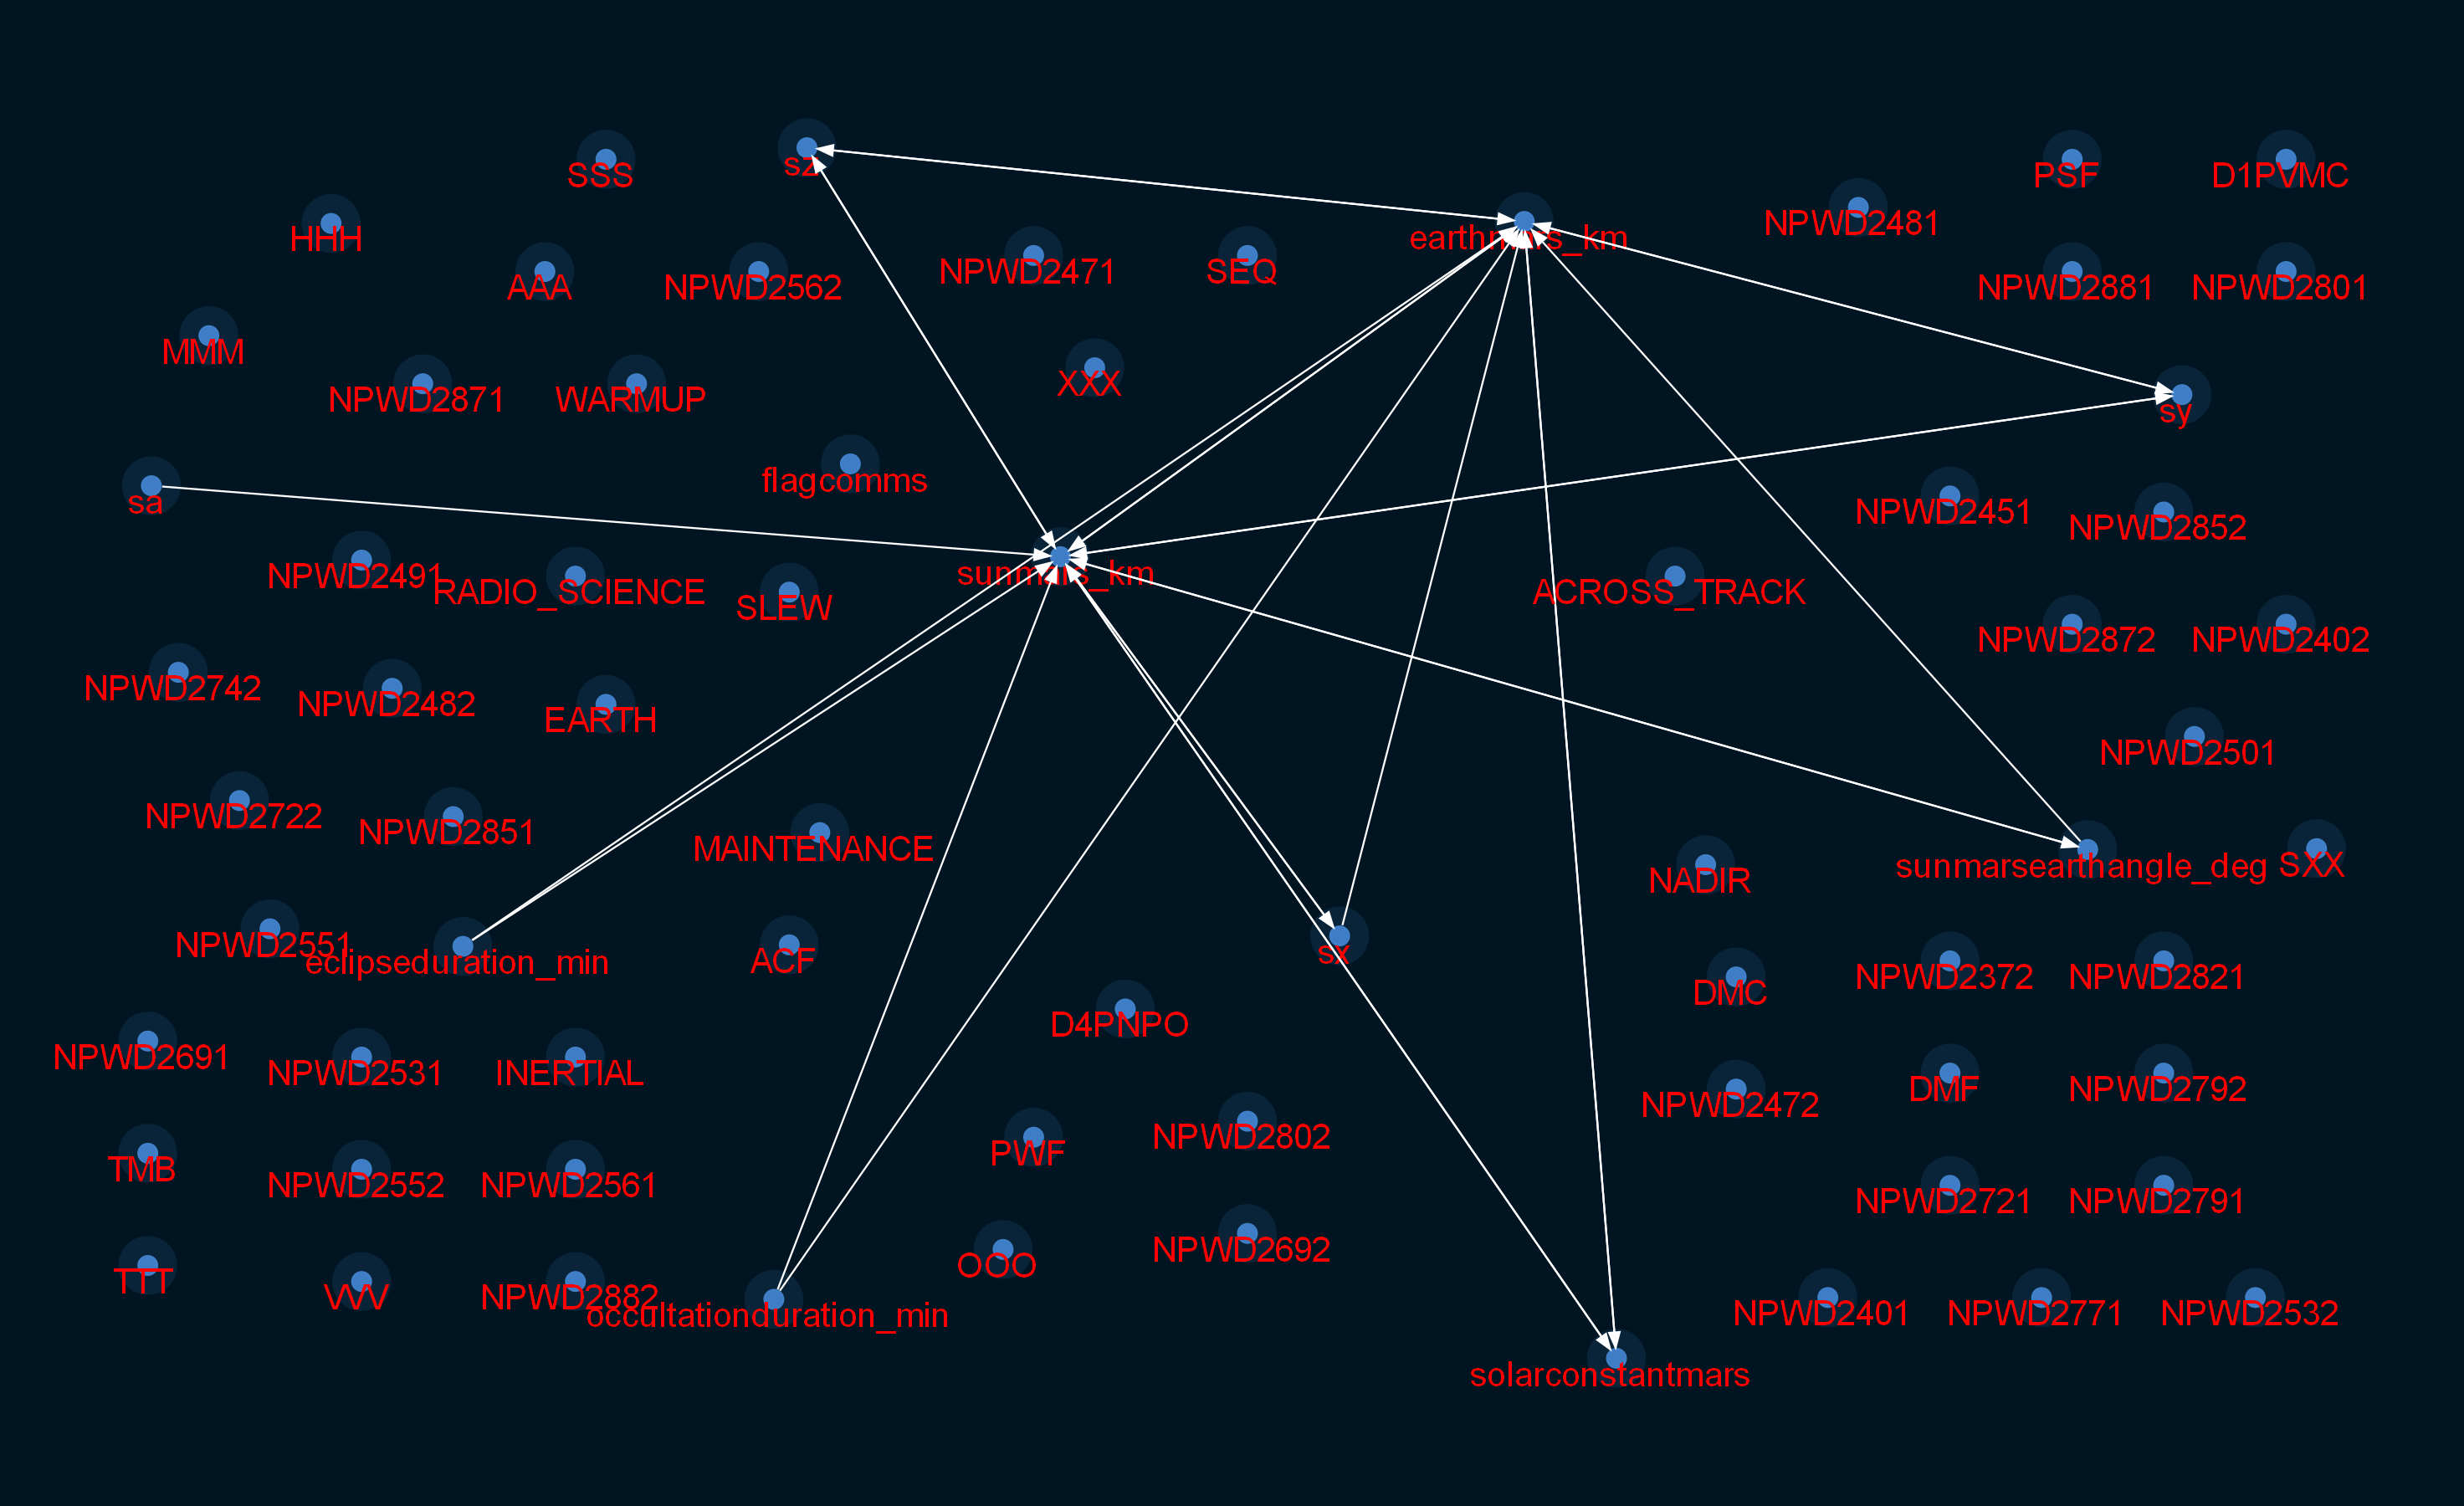

In [10]:
# Vemos que a partir de 7.707169e-08 empiezan a entrar relaciones que a priori tienen poco sentido, así que estableceremos el umbral ahí.

a.reset_threshold(7.707169e-08)

viz = a.get_graph()

Image(viz.draw(format="png"))

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'sunmarsearthangle_deg', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'sunmarsearthangle_deg', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


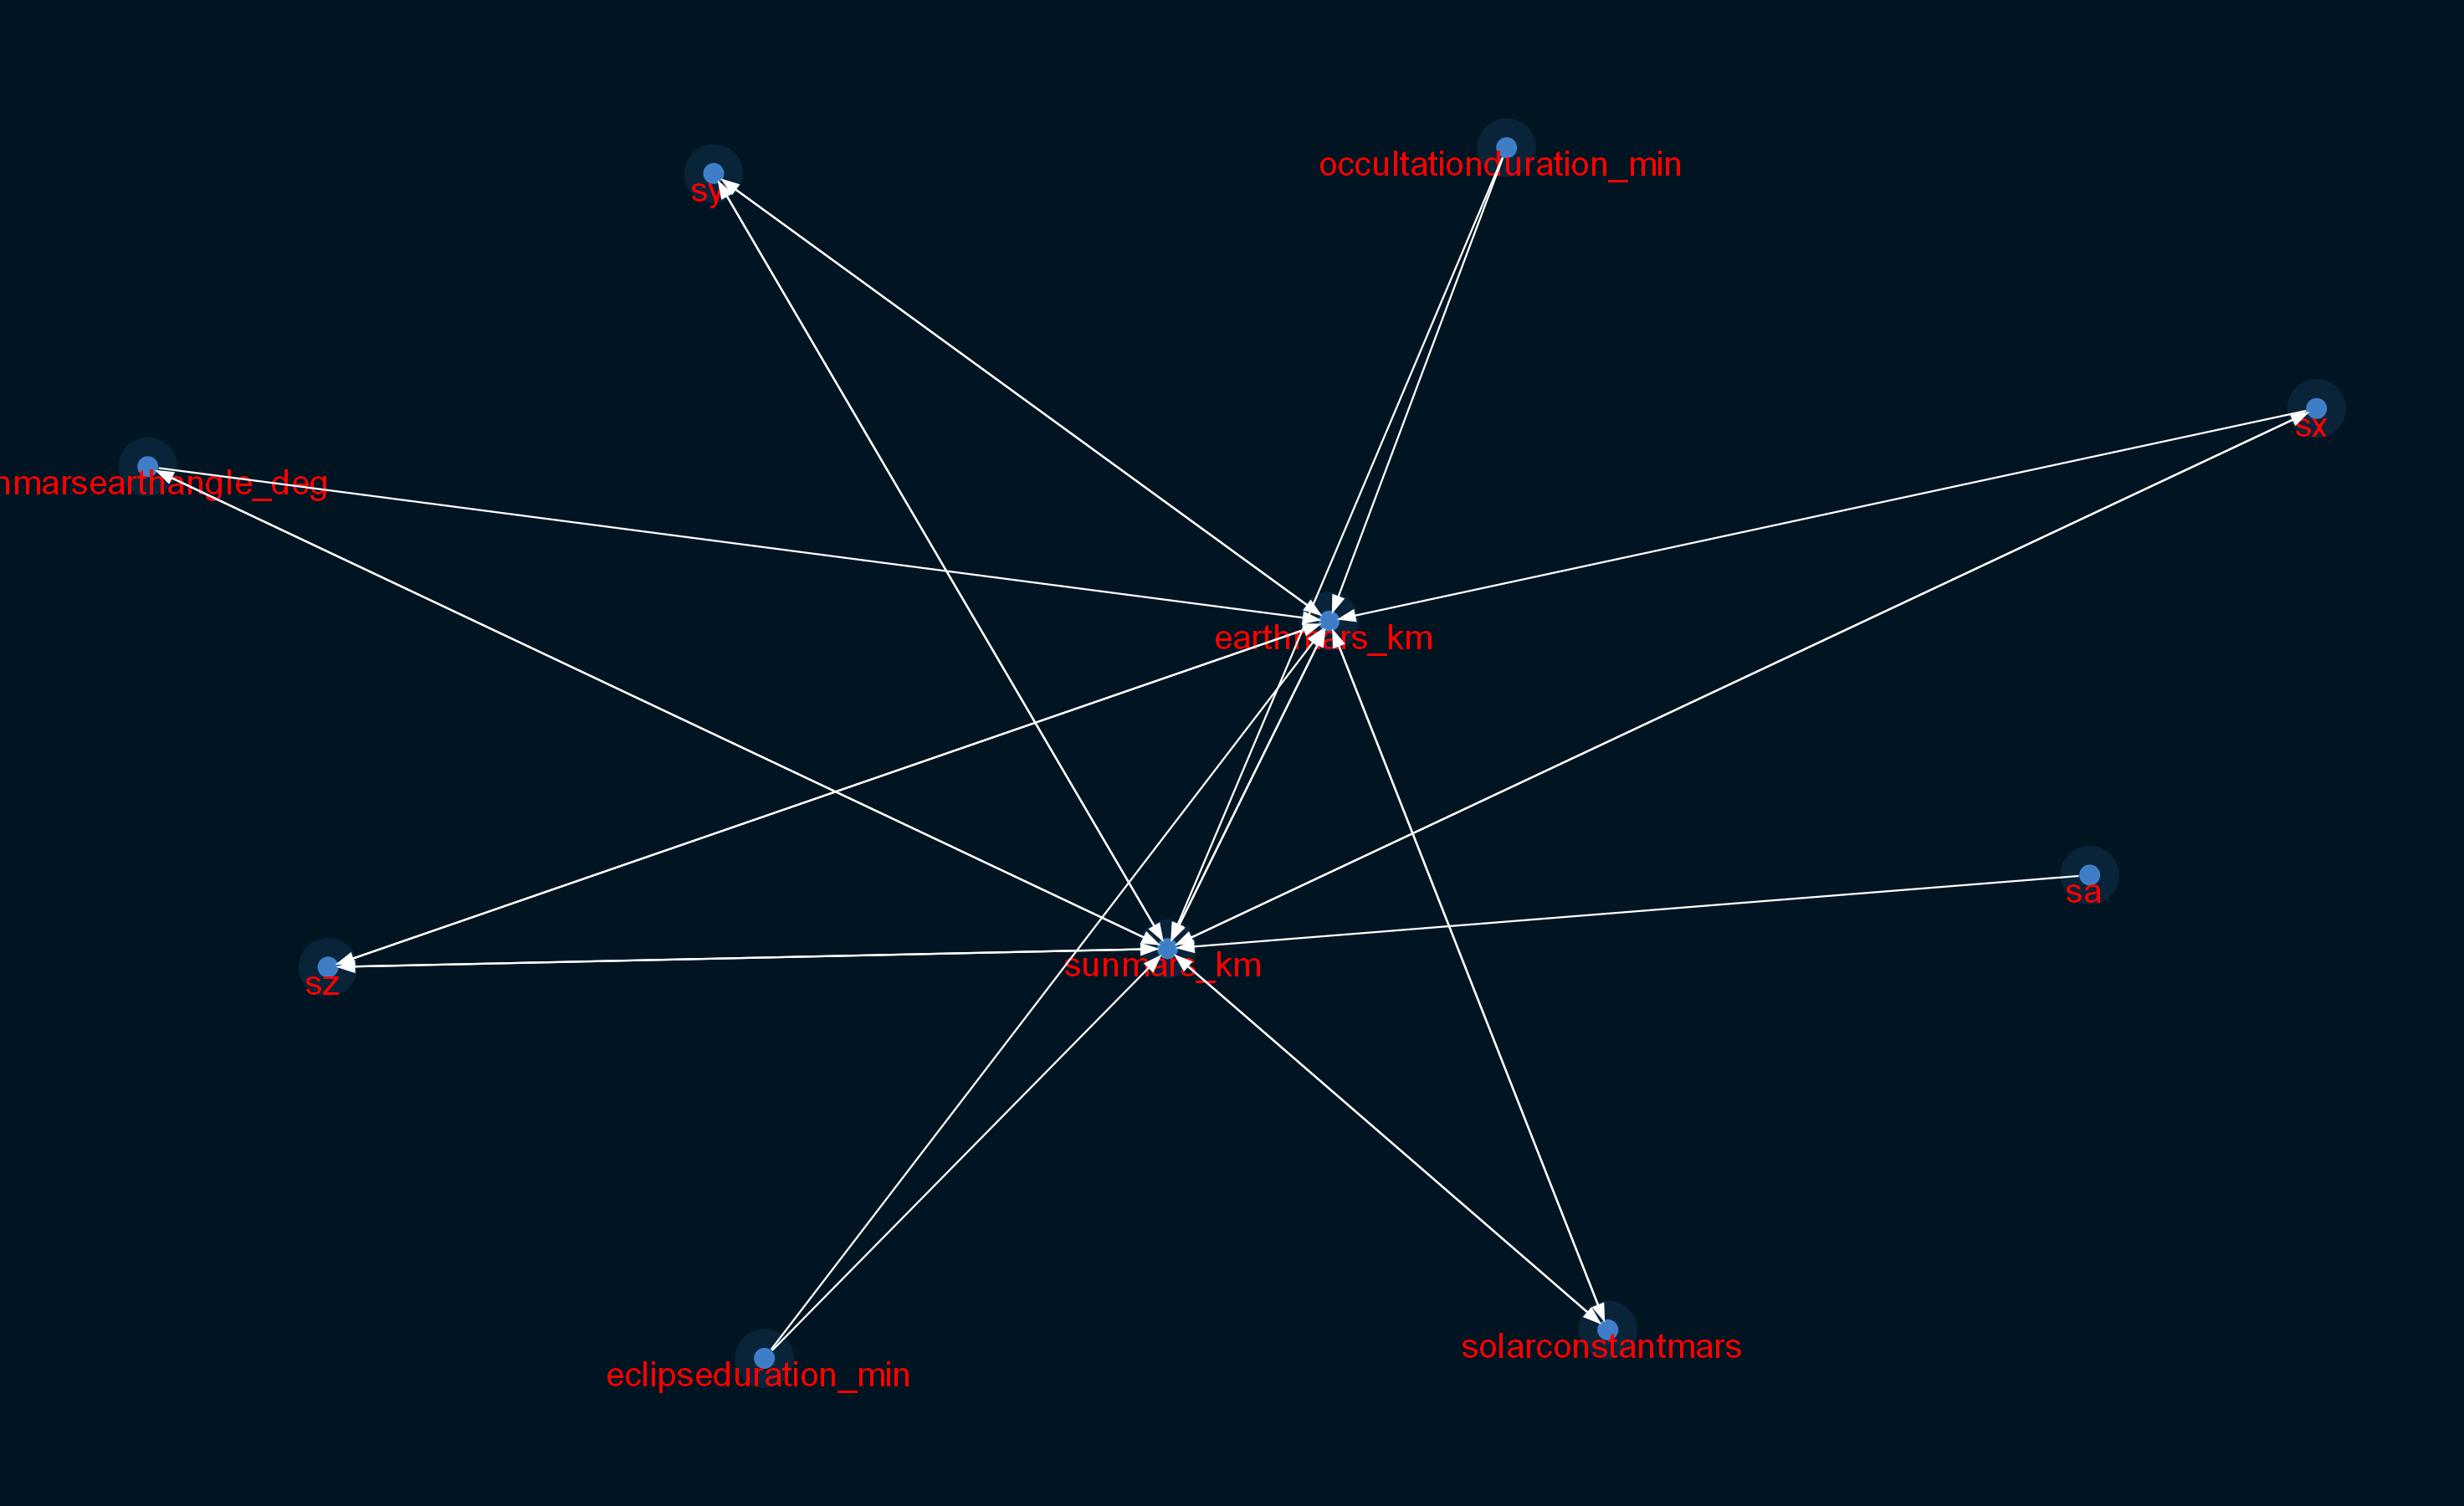

In [11]:
# Nos quedamos solo con el subgrafo que nos interesa

viz = a.get_graph(largest_subgraph=True)

Image(viz.draw(format="png"))

In [12]:
df = a.edges_to_dataframe()
df

source                 target        weight
0                        sa             sunmars_km  1.857411e-07
1                        sx             sunmars_km  7.435971e-07
2                        sx           earthmars_km  1.891186e-07
3                        sy             sunmars_km  2.736351e-06
4                        sy           earthmars_km  1.233721e-06
5                        sz             sunmars_km  3.274689e-06
6                        sz           earthmars_km  1.311686e-06
7                sunmars_km                     sx  1.065811e-07
8                sunmars_km                     sy  2.636294e-07
9                sunmars_km                     sz  3.548845e-07
10               sunmars_km           earthmars_km  1.085003e+00
11               sunmars_km  sunmarsearthangle_deg  1.088616e-07
12               sunmars_km      solarconstantmars  1.307852e-06
13             earthmars_km                     sy  1.040505e-07
14             earthmars_km                     sz  8.287077e-08
15             earthmars_km             sunmars_km  8.070393e-02
16             earthmars_km      solarconstantmars  1.054588e-06
17    sunmarsearthangle_deg             sunmars_km  7.434865e-07
18    sunmarsearthangle_deg           earthmars_km  1.794857e-07
19        solarconstantmars             sunmars_km  1.742341e-05
20        solarconstantmars           earthmars_km  9.406414e-06
21      eclipseduration_min             sunmars_km  5.072701e-07
22      eclipseduration_min           earthmars_km  1.892352e-07
23  occultationduration_min             sunmars_km  5.789288e-07
24  occultationduration_min           earthmars_km  1.719463e-07

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'sunmarsearthangle_deg', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


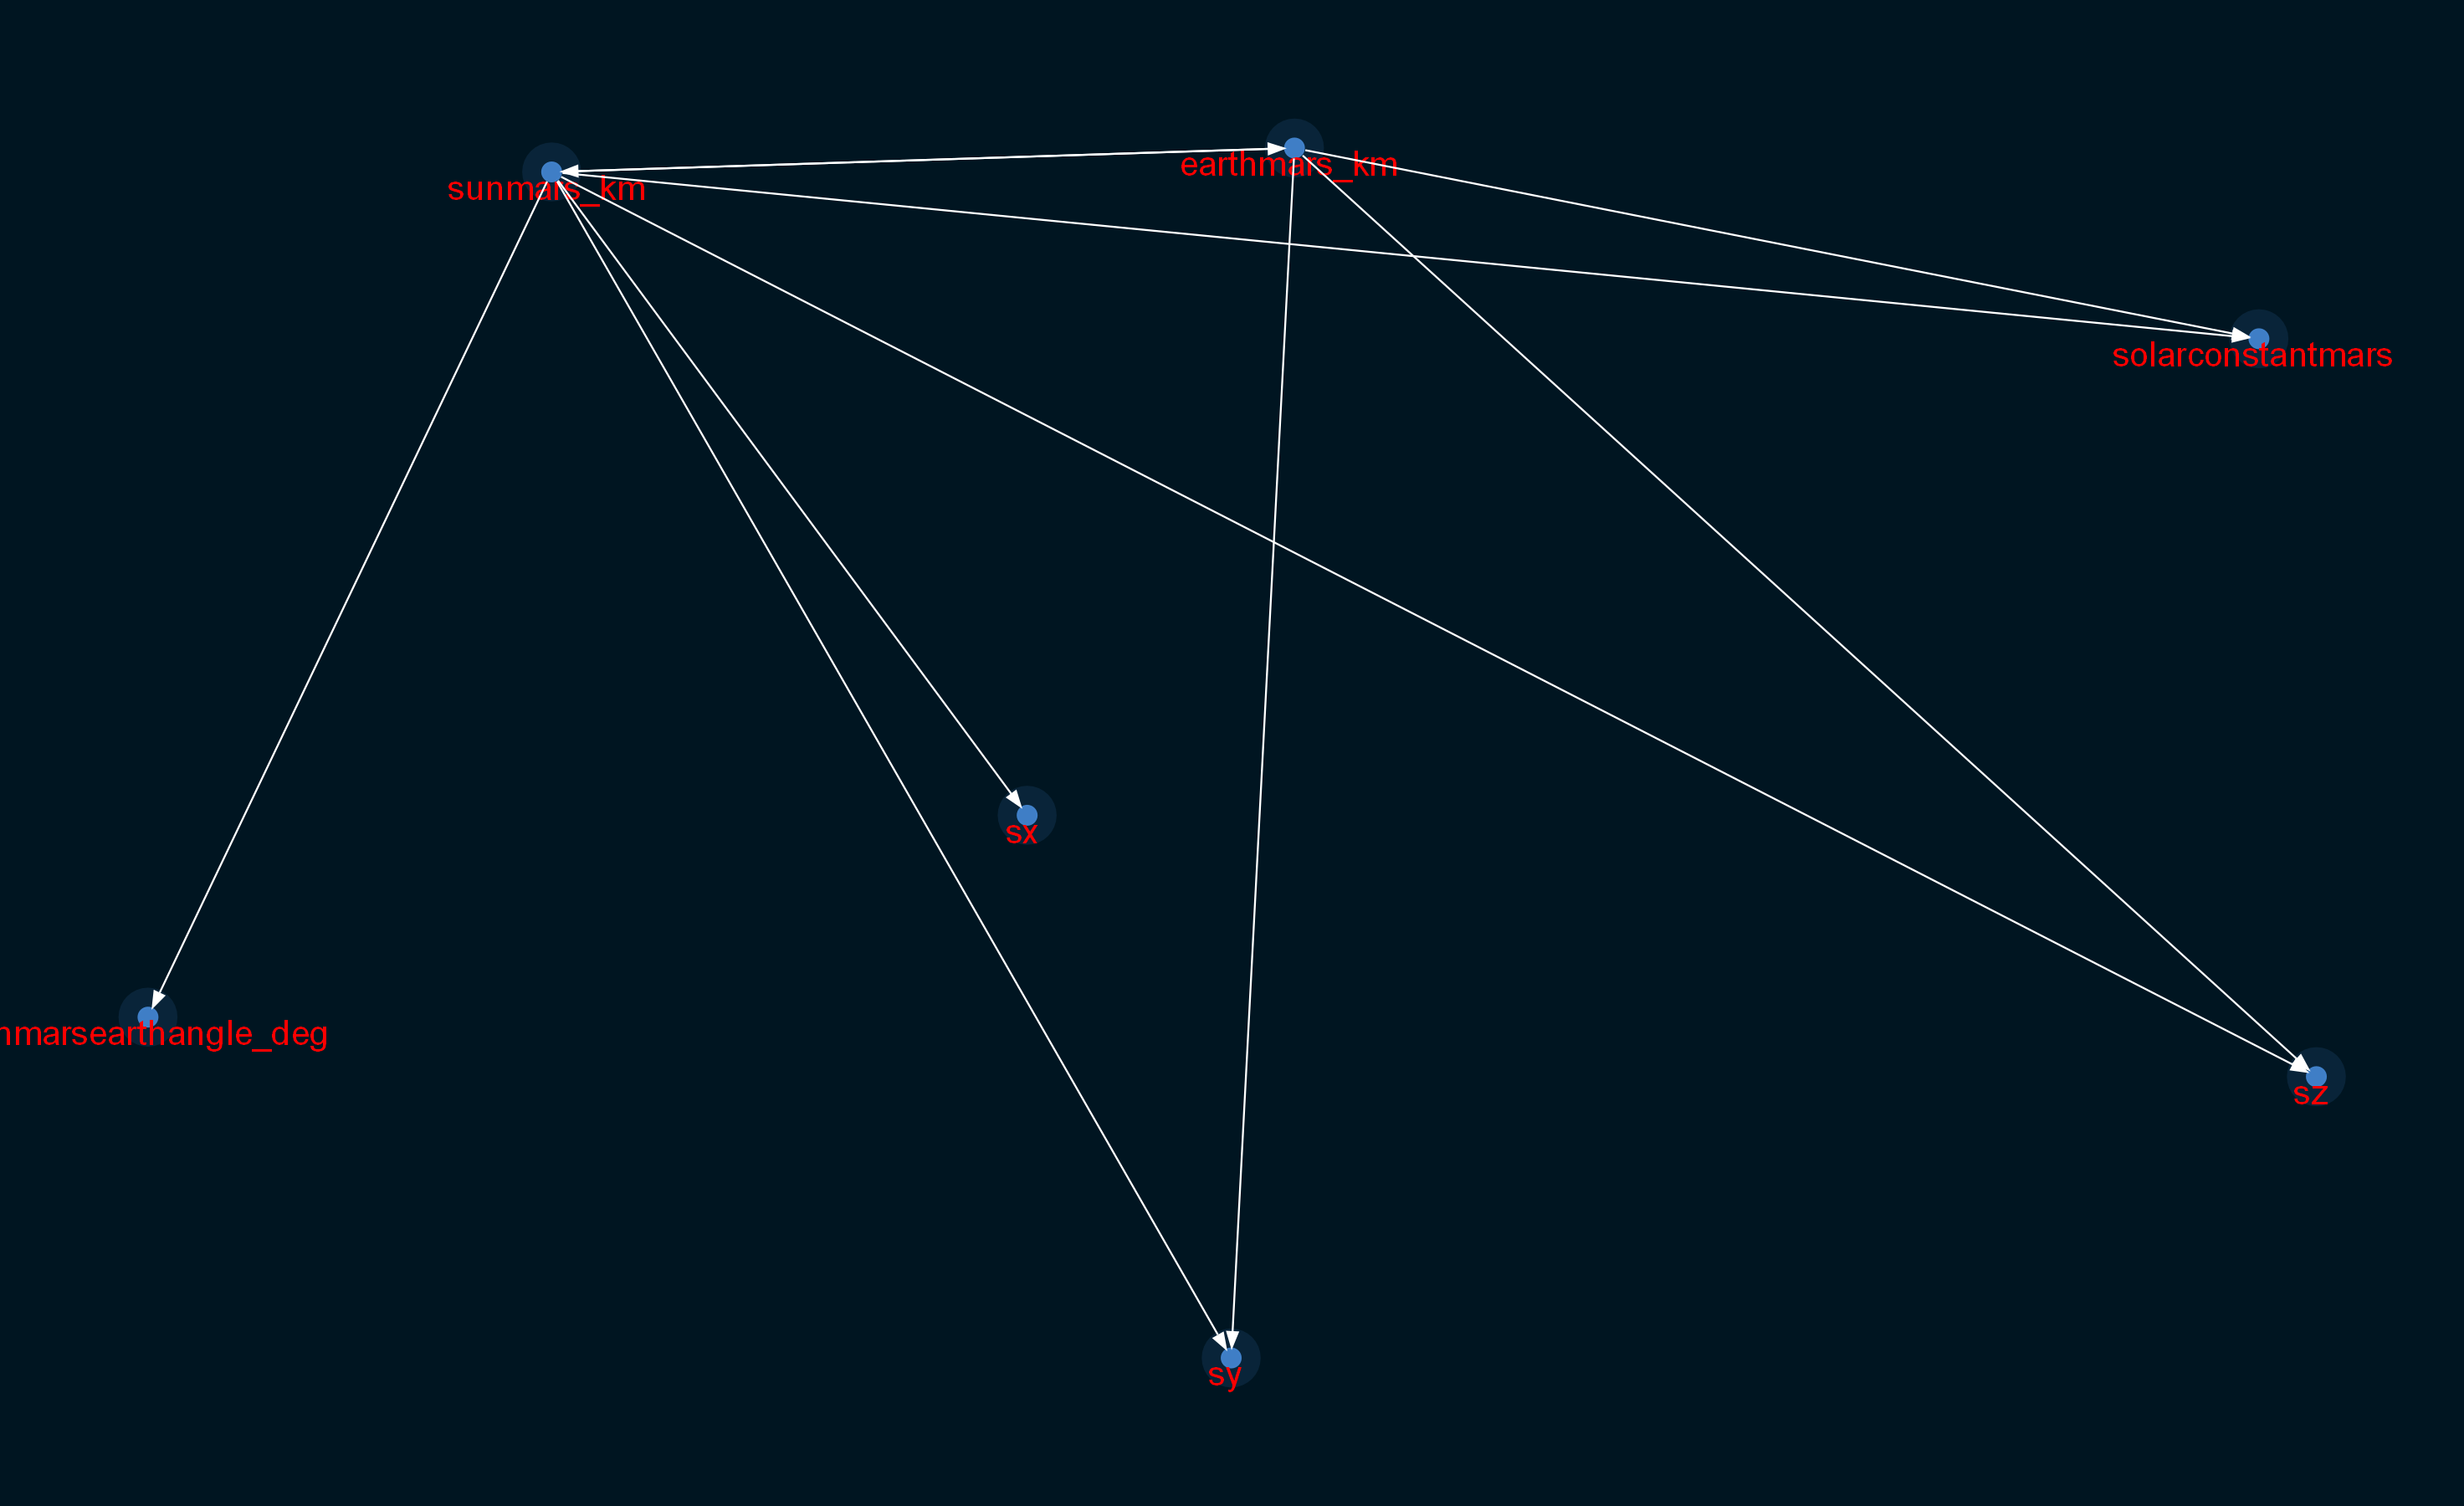

In [13]:
edges_to_remove = [(row["source"], row["target"]) for i, row in df.iterrows() if row["target"] in ["sunmars_km", "earthmars_km"] and row["source"] not in ["sunmars_km", "earthmars_km"]  ]
a.remove_edges(edges=edges_to_remove)

viz = a.get_graph(largest_subgraph=True)

Image(viz.draw(format="png"))

Run Image(result.draw(format='png')) to draw the graph


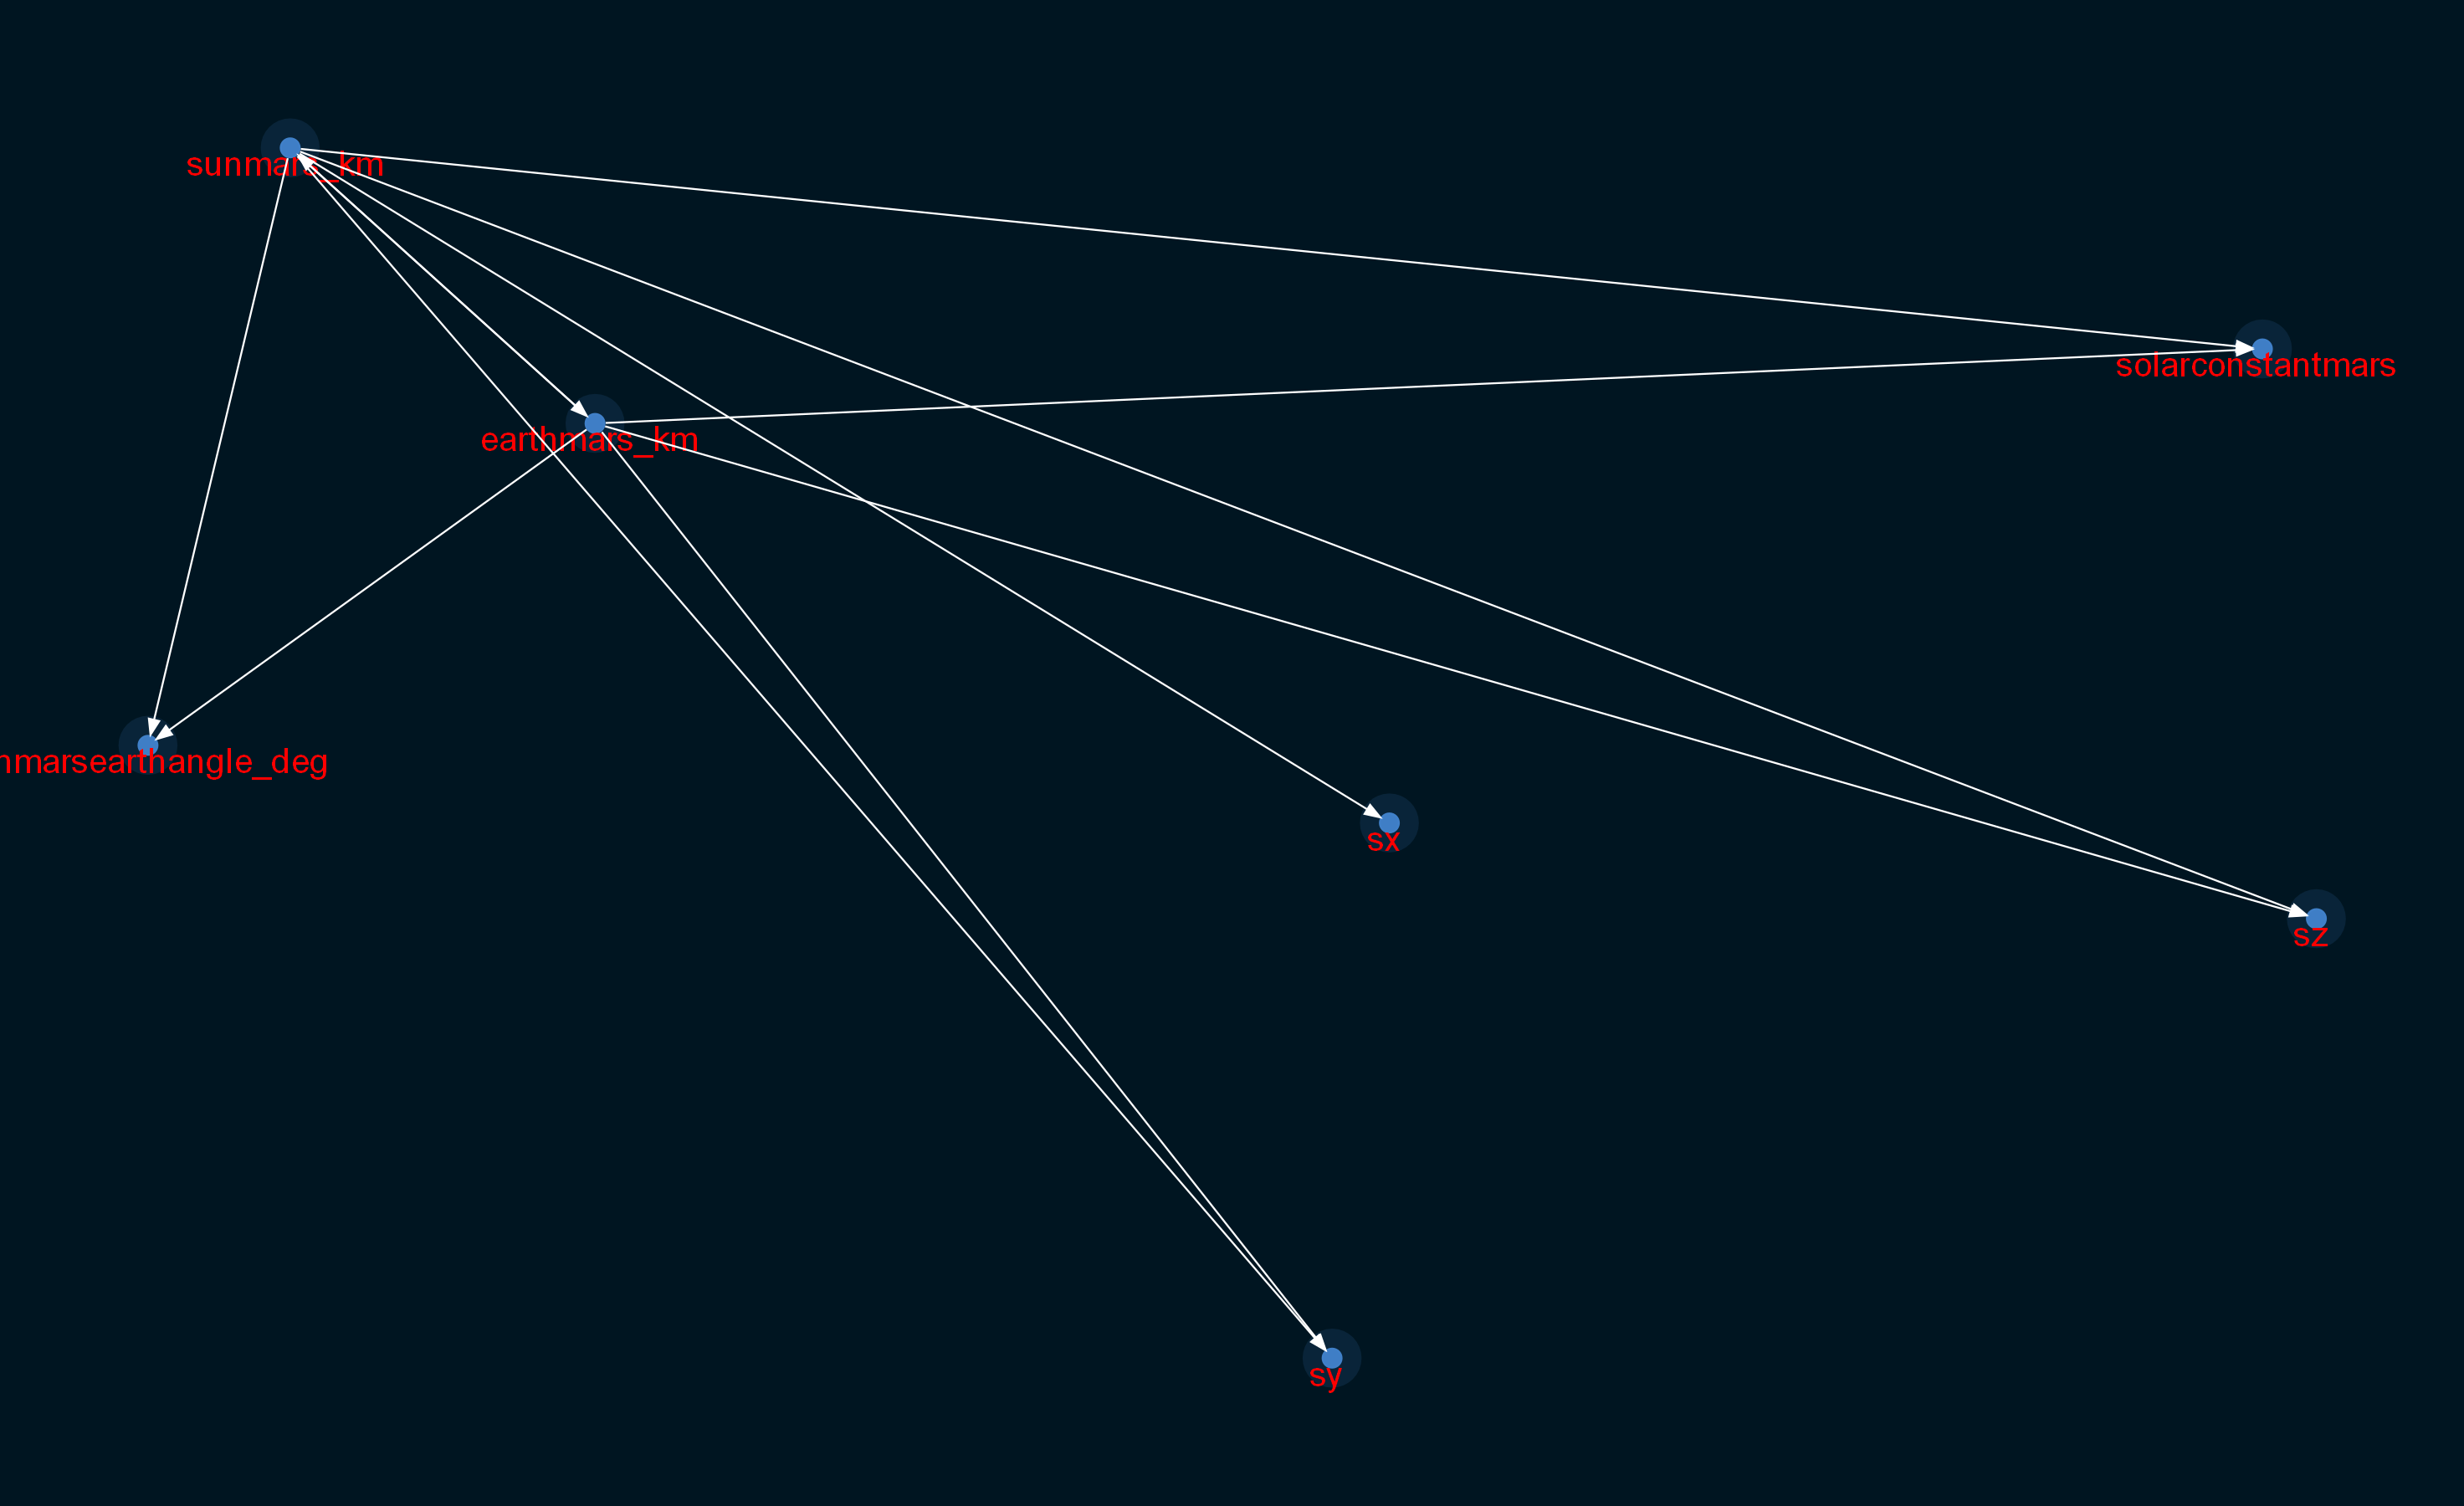

In [14]:
edges_to_add = [("earthmars_km", "sunmarsearthangle_deg")]
a.add_edges(edges=edges_to_add)


viz = a.get_graph(largest_subgraph=True)

Image(viz.draw(format="png"))